# Compare smoothed waveforms

Experimental/simulation data have already been processed into time series of smoothed harmonics.

Settings.inp constains parameters for this script as well as the harmonic splitter used to get the smoothed harmonics.

Weights?

This script should not need to be modified by general users. All done via the settings.inp file which is created by the "GenerateScript" python notebook.

There is a plotting option at the bottom of this script that can be activated manually - leave turned off for running with the bash script.

## Simulation or experiment inputs

Take arguments from command line

In [3]:
import sys
print "This is the name of the script: ", sys.argv[0]
print "Number of arguments: ", len(sys.argv)
print "The arguments are: " , str(sys.argv)

This is the name of the script:  C:\Users\gk250818\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py
Number of arguments:  3
The arguments are:  ['C:\\Users\\gk250818\\AppData\\Local\\Continuum\\Anaconda2\\lib\\site-packages\\ipykernel\\__main__.py', '-f', 'C:\\Users\\gk250818\\AppData\\Roaming\\jupyter\\runtime\\kernel-0706ea55-84b7-4681-8749-ac0bf96ba5c1.json']


## Read settings

input the total number of frequencies to check; i.e. all frequencies, harmonics, cross harmonics etc
specified in harmonic splitter when this was created

weights file (made by generate script?)

In [4]:
lines = [line.rstrip('\n') for line in open('Settings.inp')]
filename = lines[0].strip().split()[0]
number_harmonics = int(lines[1].strip().split()[0])
frequency_bandwidth = float(lines[2].strip().split()[0])
filename_exp = lines[3].strip().split()[0]
filename_sim = lines[4].strip().split()[0]
results_name = lines[5].strip().split()[0]

### Load packages

In [60]:
import numpy as np


## Define functions

Read smoothed time series data. Generalise to take any number of harmonics and weights.
For example we have 2 input frequencies and the 2nd harmonic of the 1st input frequency is more important.
Default is all equally weighted.

Generally, i=0 is the dc componet, others are harmonics. But does not have to be.

In [7]:
def ReadSmoothedOld(filename, number_harmonics):
    f = open(filename, 'r')
    time = []
    i_Harm = []
    i_dc = []
    i_H1 = []
    i_H2 = []
    i_H3 = []
    i_H4 = []
    i_H5 = []
    i_H6 = []
    for line in f:
        columns = line.split()
        time.append(float(columns[0]))
        i_dc.append(float(columns[1]))
        i_H1.append(float(columns[2]))
        i_H2.append(float(columns[3]))
        i_H3.append(float(columns[4]))
        i_H4.append(float(columns[5]))
        i_H5.append(float(columns[6]))
        i_H6.append(float(columns[7]))
        for j in range(number_harmonics+1):
            print j
    return time, i_dc, i_H1, i_H2, i_H3, i_H4, i_H5, i_H6

In [62]:
def ReadSmoothed(filename):
    lines = [line.rstrip('\n') for line in open('Smoothed.txt')]

    n_rows = len(lines)
    n_cols = len(lines[0].strip().split())
    n_harm = n_cols - 1

    n_elements = n_harm * n_rows
    i_harm = np.zeros((n_harm, n_rows))

    time = []
    for i in range(n_rows):
        time.append(float(lines[i].strip().split()[0]))
        for j in range(n_harm):
            i_harm[j, i] = float(lines[i].strip().split()[j])
    return n_rows, n_harm, time, i_harm

In [58]:
time[0:10]

[0.0,
 0.0002048,
 0.0004096,
 0.0006144,
 0.0008192,
 0.001024,
 0.0012288,
 0.0014336,
 0.0016384,
 0.0018432]

In [59]:
i_harm[0, 0:10]

array([ 0.       ,  0.0002048,  0.0004096,  0.0006144,  0.0008192,
        0.001024 ,  0.0012288,  0.0014336,  0.0016384,  0.0018432])

Simple least squares function scaled by the sum of squares of the first input function - used for comparison. 

Combine these by weights to get the final metric.

This assumes that they perfectly align (they do on the test case and rest made by MECSim so should too)

In [63]:
def LeastSquares(y1, y2): # first is the basis for comparision
    S = 0.0
    X = 0.0
    for i in range(len(y1)):
        S += (y1[i]-y2[i])**2.
        X += y1[i]**2.
    return S/X

## Read files

Set experimental and simulation files for comparison

In [65]:
# experiment file for basis
n_rows_exp, n_harm_exp, t_exp, i_Harm_exp = ReadSmoothed(filename_exp)

# simulation file for comparison
n_rows_sim, n_harm_sim, t_sim, i_Harm_sim = ReadSmoothed(filename_sim)

These should match up

In [69]:
print n_rows_exp, n_harm_exp
print n_rows_sim, n_harm_sim
print n_harm_exp!=n_harm_sim
if(n_harm_exp!=n_harm_sim):
    print "Number of harmonics does not match"
if(n_rows_exp!=n_rows_sim):
    print "Number of rows in smoothed data does not match"


65536 7
65536 7
False


## Calculate metric

In [10]:
S = [0.0,0.0,0.0,0.0,0.0,0.0,0.0]
S[0] = LeastSquares(i_dc1, i_dc2)
S[1] = LeastSquares(i_H11, i_H12)
S[2] = LeastSquares(i_H21, i_H22)
S[3] = LeastSquares(i_H31, i_H32)
S[4] = LeastSquares(i_H41, i_H42)
S[5] = LeastSquares(i_H51, i_H52)
S[6] = LeastSquares(i_H61, i_H62)
Smetric = 0.0
for i in range(5):
    if(i>0):
        Smetric+=S[i]
print Smetric
print S

2.88497268504
[0.16311558004955976, 0.13332678499569892, 0.5070868844187161, 0.9155230481633738, 1.3290359674607723, 1.7418964897913027, 1.7572077458615565]


## Write to summary results file

## Use interactive plotter

ONLY if not using this in bash script

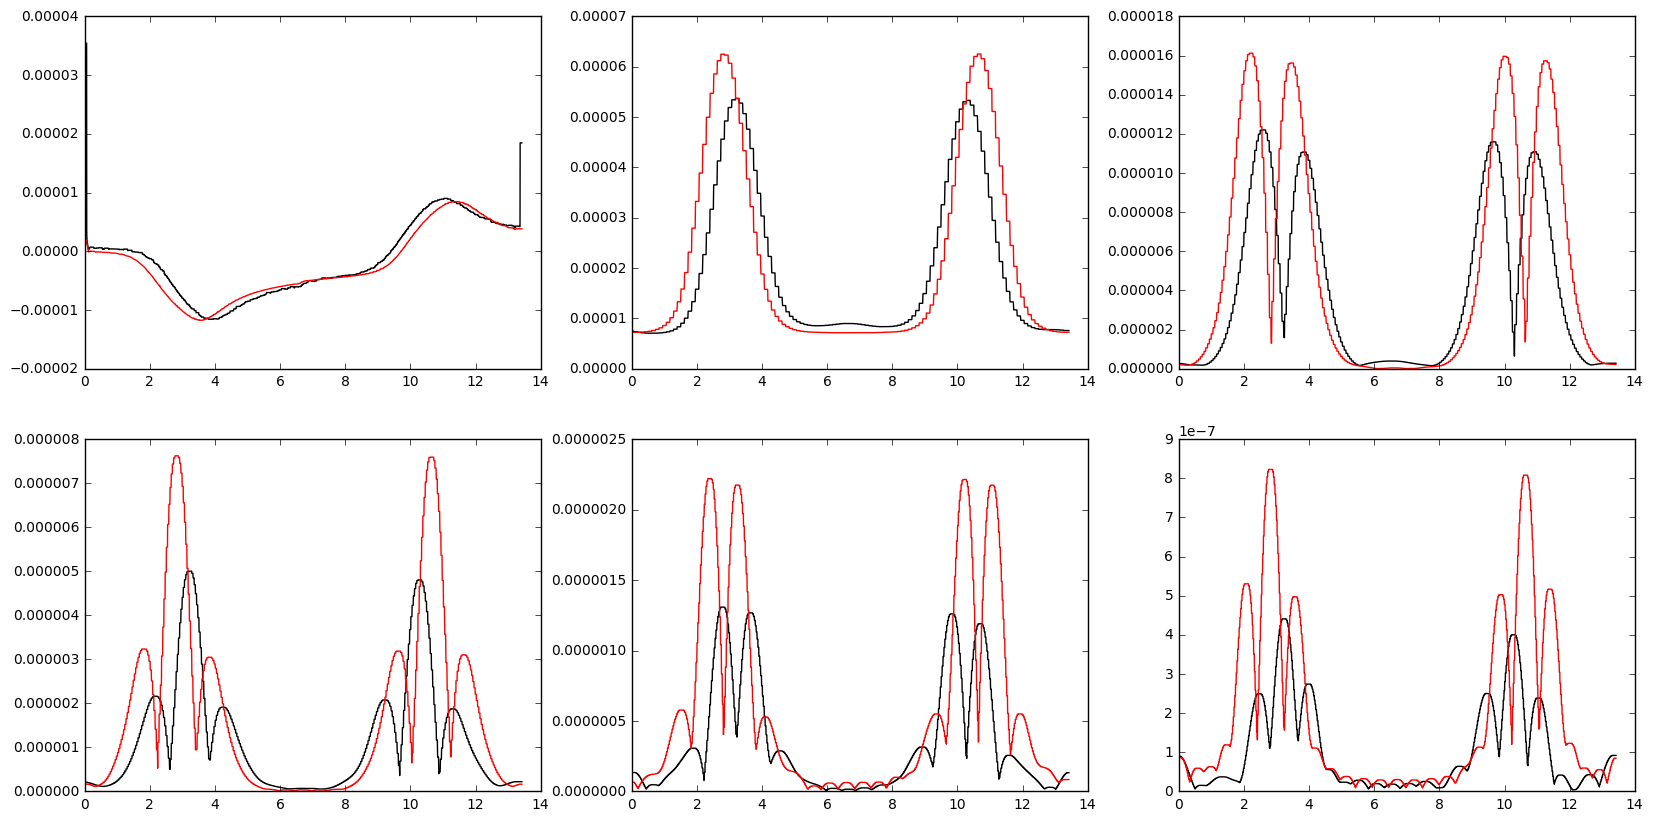

In [7]:
plotInteractive = True
if(plotInteractive):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(20,10))
    plt.subplot(231)
    plt.plot(t_1, i_dc1,c='k')
    plt.plot(t_2, i_dc2,c='r')
    plt.subplot(232)
    plt.plot(t_1, i_H11,c='k')
    plt.plot(t_2, i_H12,c='r')
    #plt.xlim(0,100)
    plt.subplot(233)
    plt.plot(t_1, i_H21,c='k')
    plt.plot(t_2, i_H22,c='r')
    #plt.xlim(0,100)
    plt.subplot(234)
    plt.plot(t_1, i_H31,c='k')
    plt.plot(t_2, i_H32,c='r')
    plt.subplot(235)
    plt.plot(t_1, i_H41,c='k')
    plt.plot(t_2, i_H42,c='r')
    #plt.xlim(0,100)
    plt.subplot(236)
    plt.plot(t_1, i_H51,c='k')
    plt.plot(t_2, i_H52,c='r')
    plt.show()